# <a>Project 1 - Exploratory Data Analysis</a>

## Let's Data - Data Science Journey

*By Reginaldo Jr - <a>reginaldojr@yahoo.com</a>*

## Imports and Configurations

In [1]:
import pandas  as pd
import seaborn as sns
import os
import warnings

from matplotlib import pyplot as plt
from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

sns.set_style("darkgrid")

warnings.filterwarnings('ignore')

## Data

In [2]:
if not os.path.exists("MICRODADOS_ENEM_2021_10_POR_CENTO.csv"):
    df = pd.read_csv("MICRODADOS_ENEM_2021.csv", sep=";", encoding="latin_1")
    print ("Original data: ", df.shape)
    df = df.sample(n=len(df)//10, random_state=42, replace=False)
    
    df = df.drop([col for col in df.columns if col.startswith("TX_") ], axis=1)
    df = df.drop([col for col in df.columns if col.startswith("CO_") ], axis=1)
    df = df.drop([col for col in df.columns if "MUNICIPIO" in col ], axis=1)
    df = df.drop(["NU_INSCRICAO", "NU_ANO" ], axis=1)
    
    df.to_csv("MICRODADOS_ENEM_2021_10_POR_CENTO.csv")

In [3]:
df = pd.read_csv("MICRODADOS_ENEM_2021_10_POR_CENTO.csv")
df.head()

Unnamed: 0  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0           0                2       F                0            2   
1           1                3       M                1            1   
2           2               11       F                0            0   
3           3                3       M                1            2   
4           4                3       F                1            1   

   TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  \
0                 1                2                0          2       1.00   
1                 1                2                0          2       1.00   
2                 1                1                7          1        NaN   
3                 1                2                0          2       1.00   
4                 1                2                0          2       1.00   

   IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  \
0             0       NaN                     NaN                 NaN   
1             0        MT                    4.00                1.00   
2             0       NaN                     NaN                 NaN   
3             0        SP                    2.00                1.00   
4             0        SP                    4.00                1.00   

   TP_SIT_FUNC_ESC SG_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  \
0              NaN          PE               1               1   
1             1.00          MT               1               1   
2              NaN          SP               0               0   
3             1.00          SP               1               1   
4             1.00          SP               1               1   

   TP_PRESENCA_LC  TP_PRESENCA_MT  NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  \
0               1               1      401.70      484.40      407.30   
1               1               1      660.70      481.40      623.20   
2               0               0         NaN         NaN         NaN   
3               1               1      396.00      475.50      451.80   
4               1               1      358.40      435.60      478.50   

   NU_NOTA_MT  TP_LINGUA  TP_STATUS_REDACAO  NU_NOTA_COMP1  NU_NOTA_COMP2  \
0      410.90          0               1.00         120.00         120.00   
1      627.60          0               1.00         160.00         200.00   
2         NaN          0                NaN            NaN            NaN   
3      476.10          0               1.00          80.00         120.00   
4      544.70          0               1.00         120.00         100.00   

   NU_NOTA_COMP3  NU_NOTA_COMP4  NU_NOTA_COMP5  NU_NOTA_REDACAO Q001 Q002  \
0         120.00         120.00         140.00           620.00    B    E   
1         120.00         160.00         200.00           840.00    E    E   
2            NaN            NaN            NaN              NaN    E    E   
3          80.00         120.00         140.00           540.00    D    D   
4         100.00         120.00         100.00           540.00    F    G   

  Q003 Q004  Q005 Q006 Q007 Q008 Q009 Q010 Q011 Q012 Q013 Q014 Q015 Q016 Q017  \
0    B    D  5.00    C    A    B    C    A    A    B    B    A    A    B    A   
1    E    E  4.00    M    D    E    E    B    B    B    B    B    A    B    A   
2    F    B  4.00    E    A    D    D    A    A    B    B    B    A    A    A   
3    B    C  4.00    D    A    B    C    B    A    B    B    B    B    B    A   
4    D    B  3.00    F    A    B    B    B    A    B    B    B    A    B    A   

  Q018 Q019 Q020 Q021 Q022 Q023 Q024 Q025  
0    A    B    A    A    E    A    A    B  
1    B    C    A    A    E    A    C    B  
2    B    D    A    A    C    A    A    B  
3    B    B    A    A    E    A    B    B  
4    A    C    B    B    C    A    C    B

In [4]:
df.shape

(338983, 57)

In [5]:
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
0                2       F                0            2                 1   
1                3       M                1            1                 1   
2               11       F                0            0                 1   
3                3       M                1            2                 1   
4                3       F                1            1                 1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
0                2                0          2       1.00             0   
1                2                0          2       1.00             0   
2                1                7          1        NaN             0   
3                2                0          2       1.00             0   
4                2                0          2       1.00             0   

  SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
0       NaN                     NaN                 NaN              NaN   
1        MT                    4.00                1.00             1.00   
2       NaN                     NaN                 NaN              NaN   
3        SP                    2.00                1.00             1.00   
4        SP                    4.00                1.00             1.00   

  SG_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
0          PE               1               1               1               1   
1          MT               1               1               1               1   
2          SP               0               0               0               0   
3          SP               1               1               1               1   
4          SP               1               1               1               1   

   NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  \
0      401.70      484.40      407.30      410.90          0   
1      660.70      481.40      623.20      627.60          0   
2         NaN         NaN         NaN         NaN          0   
3      396.00      475.50      451.80      476.10          0   
4      358.40      435.60      478.50      544.70          0   

   TP_STATUS_REDACAO  NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  \
0               1.00         120.00         120.00         120.00   
1               1.00         160.00         200.00         120.00   
2                NaN            NaN            NaN            NaN   
3               1.00          80.00         120.00          80.00   
4               1.00         120.00         100.00         100.00   

   NU_NOTA_COMP4  NU_NOTA_COMP5  NU_NOTA_REDACAO Q001 Q002 Q003 Q004  Q005  \
0         120.00         140.00           620.00    B    E    B    D  5.00   
1         160.00         200.00           840.00    E    E    E    E  4.00   
2            NaN            NaN              NaN    E    E    F    B  4.00   
3         120.00         140.00           540.00    D    D    B    C  4.00   
4         120.00         100.00           540.00    F    G    D    B  3.00   

  Q006 Q007 Q008 Q009 Q010 Q011 Q012 Q013 Q014 Q015 Q016 Q017 Q018 Q019 Q020  \
0    C    A    B    C    A    A    B    B    A    A    B    A    A    B    A   
1    M    D    E    E    B    B    B    B    B    A    B    A    B    C    A   
2    E    A    D    D    A    A    B    B    B    A    A    A    B    D    A   
3    D    A    B    C    B    A    B    B    B    B    B    A    B    B    A   
4    F    A    B    B    B    A    B    B    B    A    B    A    A    C    B   

  Q021 Q022 Q023 Q024 Q025  
0    A    E    A    A    B  
1    A    E    A    C    B  
2    A    C    A    A    B  
3    A    E    A    B    B  
4    B    C    A    C    B

In [6]:
df.dtypes

TP_FAIXA_ETARIA             int64
TP_SEXO                    object
TP_ESTADO_CIVIL             int64
TP_COR_RACA                 int64
TP_NACIONALIDADE            int64
TP_ST_CONCLUSAO             int64
TP_ANO_CONCLUIU             int64
TP_ESCOLA                   int64
TP_ENSINO                 float64
IN_TREINEIRO                int64
SG_UF_ESC                  object
TP_DEPENDENCIA_ADM_ESC    float64
TP_LOCALIZACAO_ESC        float64
TP_SIT_FUNC_ESC           float64
SG_UF_PROVA                object
TP_PRESENCA_CN              int64
TP_PRESENCA_CH              int64
TP_PRESENCA_LC              int64
TP_PRESENCA_MT              int64
NU_NOTA_CN                float64
NU_NOTA_CH                float64
NU_NOTA_LC                float64
NU_NOTA_MT                float64
TP_LINGUA                   int64
TP_STATUS_REDACAO         float64
NU_NOTA_COMP1             float64
NU_NOTA_COMP2             float64
NU_NOTA_COMP3             float64
NU_NOTA_COMP4             float64
NU_NOTA_COMP5 

In [7]:
df.shape

(338983, 56)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338983 entries, 0 to 338982
Data columns (total 56 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TP_FAIXA_ETARIA         338983 non-null  int64  
 1   TP_SEXO                 338983 non-null  object 
 2   TP_ESTADO_CIVIL         338983 non-null  int64  
 3   TP_COR_RACA             338983 non-null  int64  
 4   TP_NACIONALIDADE        338983 non-null  int64  
 5   TP_ST_CONCLUSAO         338983 non-null  int64  
 6   TP_ANO_CONCLUIU         338983 non-null  int64  
 7   TP_ESCOLA               338983 non-null  int64  
 8   TP_ENSINO               109443 non-null  float64
 9   IN_TREINEIRO            338983 non-null  int64  
 10  SG_UF_ESC               81161 non-null   object 
 11  TP_DEPENDENCIA_ADM_ESC  81161 non-null   float64
 12  TP_LOCALIZACAO_ESC      81161 non-null   float64
 13  TP_SIT_FUNC_ESC         81161 non-null   float64
 14  SG_UF_PROVA         

## EDA

In [9]:
df.describe()

TP_FAIXA_ETARIA  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
count        338983.00        338983.00    338983.00         338983.00   
mean              5.31             1.05         2.05              1.03   
std               3.91             0.41         1.02              0.20   
min               1.00             0.00         0.00              0.00   
25%               2.00             1.00         1.00              1.00   
50%               4.00             1.00         2.00              1.00   
75%               7.00             1.00         3.00              1.00   
max              20.00             4.00         5.00              4.00   

       TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
count        338983.00        338983.00  338983.00  109443.00     338983.00   
mean              1.61             2.59       1.39       1.01          0.13   
std               0.72             4.29       0.59       0.08          0.34   
min               1.00             0.00       1.00       1.00          0.00   
25%               1.00             0.00       1.00       1.00          0.00   
50%               1.00             0.00       1.00       1.00          0.00   
75%               2.00             3.00       2.00       1.00          0.00   
max               4.00            15.00       3.00       2.00          1.00   

       TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
count                81161.00            81161.00         81161.00   
mean                     2.46                1.03             1.02   
std                      0.94                0.18             0.20   
min                      1.00                1.00             1.00   
25%                      2.00                1.00             1.00   
50%                      2.00                1.00             1.00   
75%                      4.00                1.00             1.00   
max                      4.00                2.00             4.00   

       TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
count       338983.00       338983.00       338983.00       338983.00   
mean             0.66            0.70            0.70            0.66   
std              0.47            0.46            0.46            0.47   
min              0.00            0.00            0.00            0.00   
25%              0.00            0.00            0.00            0.00   
50%              1.00            1.00            1.00            1.00   
75%              1.00            1.00            1.00            1.00   
max              2.00            2.00            2.00            2.00   

       NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  \
count   224385.00   237607.00   237607.00   224385.00  338983.00   
mean       491.87      519.73      502.70      535.14       0.47   
std         80.34       95.80       79.10      110.32       0.50   
min          0.00        0.00        0.00        0.00       0.00   
25%        431.40      445.10      447.50      445.00       0.00   
50%        482.20      521.80      505.90      515.90       0.00   
75%        545.70      589.20      559.10      613.60       1.00   
max        856.60      846.90      802.90      953.10       1.00   

       TP_STATUS_REDACAO  NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  \
count          237607.00      237607.00      237607.00      237607.00   
mean                1.14         119.24         137.97         115.20   
std                 0.79          33.79          45.53          36.27   
min                 1.00           0.00           0.00           0.00   
25%                 1.00         100.00         120.00         100.00   
50%                 1.00         120.00         120.00         120.00   
75%                 1.00         140.00         180.00         140.00   
max                 9.00         200.00         200.00         200.00   

       NU_NOTA_COMP4  NU_NOTA_COMP5  NU_NOTA_REDACAO      Q005  
cou

In [10]:
col_notas = [col for col in df.columns if (col.startswith("NU_NOTA")) & ("COMP" not in col)]
col_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

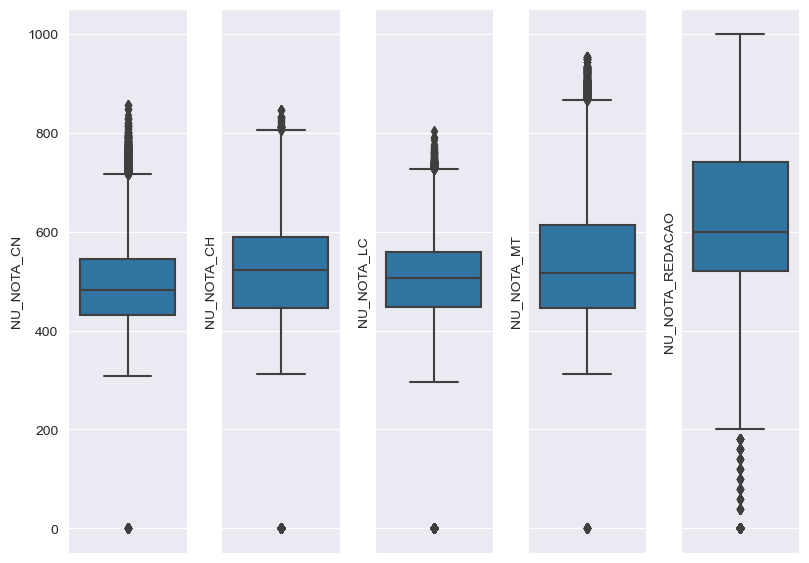

In [11]:
fig, graf = plt.subplots(1,5, sharey=True, figsize=(8,6))

plt.tight_layout()
for i,col in enumerate(col_notas):
    sns.boxplot(data=df, y=col, ax=graf[i])

In [ ]:
px.box(df, y=col_notas)

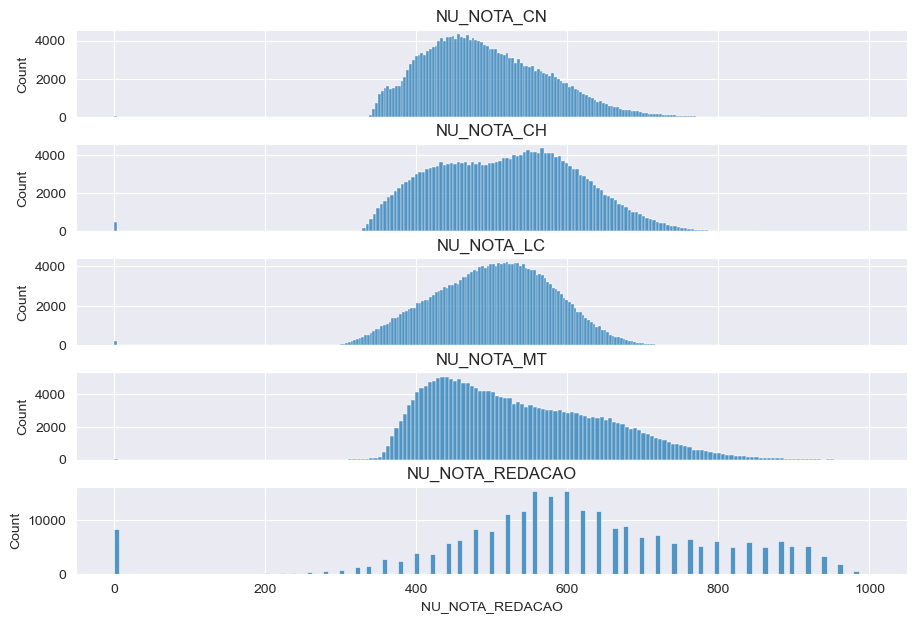

In [12]:
fig, graf = plt.subplots(5,1, sharex=True, figsize=(9,6))

plt.tight_layout()
for i,col in enumerate(col_notas):
    sns.histplot(data=df, x=col, ax=graf[i]).set_title(col)

In [ ]:
fig = make_subplots(rows=5, cols=1, subplot_titles=col_notas)

plt.tight_layout()
for i,col in enumerate(col_notas):
    trace = go.Histogram(x=df[col], showlegend=False)
    fig.append_trace(trace, i+1,1)

fig.update_layout(height=1000, width=600)
fig.show()

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

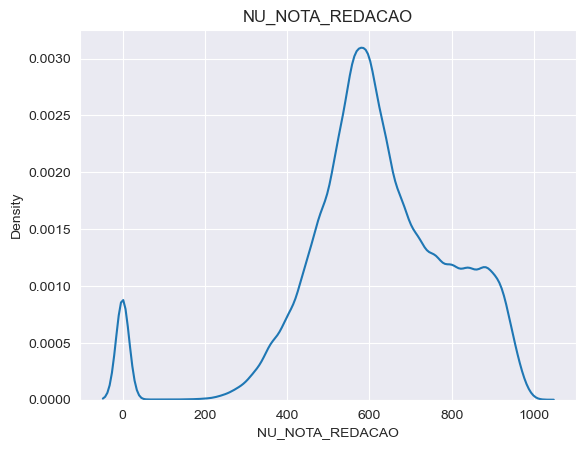

In [13]:
sns.kdeplot(data=df, x=col_notas[4]).set_title(col_notas[4])

In [14]:
'''
1 - Menor de 17 anos
2 - 17 anos
3 - 18 anos
4 - 19 anos
5 - 20 anos
6 - 21 anos
7 - 22 anos
8 - 23 anos
9 - 24 anos
10 - 25 anos
11 - Entre 26 e 30 anos
12 - Entre 31 e 35 anos
13 - Entre 36 e 40 anos
14 - Entre 41 e 45 anos
15 - Entre 46 e 50 anos
16 - Entre 51 e 55 anos
17 - Entre 56 e 60 anos
18 - Entre 61 e 65 anos
19 - Entre 66 e 70 anos
20 - Maior de 70 anos
'''

df["TP_FAIXA_ETARIA"].value_counts().sort_index()

TP_FAIXA_ETARIA
1     27786
2     62089
3     69764
4     39365
5     24981
6     17463
7     13157
8      9995
9      8560
10     7210
11    22926
12    13113
13     9284
14     5945
15     3596
16     2044
17     1096
18      406
19      144
20       59
Name: count, dtype: int64

<Axes: xlabel='TP_FAIXA_ETARIA', ylabel='Density'>

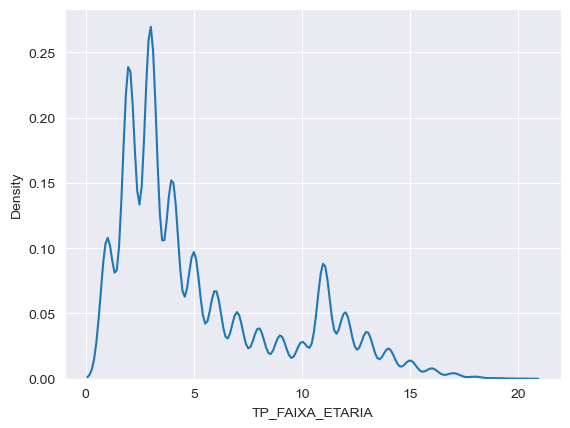

In [15]:
sns.kdeplot(data=df, x="TP_FAIXA_ETARIA")

In [16]:
df["TP_SEXO"].value_counts(normalize=True) * 100

TP_SEXO
F   61.73
M   38.27
Name: proportion, dtype: float64

<Axes: xlabel='TP_SEXO', ylabel='count'>

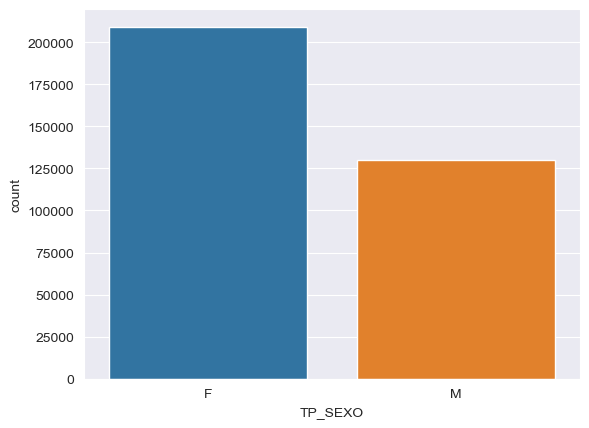

In [17]:
sns.countplot(data=df, x="TP_SEXO")

In [ ]:
fig = px.pie(pd.DataFrame(df["TP_SEXO"].value_counts()), values='count', names=pd.DataFrame(df["TP_SEXO"].value_counts()).index)
fig.show()

In [18]:
'''
0 - Não informado
1 - Solteiro(a)
2 - Casado(a)/Mora com companheiro(a)
3 - Divorciado(a)/Desquitado(a)/Separado(a)
4 - Viúvo(a)
'''
df["TP_ESTADO_CIVIL"].value_counts().sort_index()

TP_ESTADO_CIVIL
0     14169
1    299221
2     19754
3      5454
4       385
Name: count, dtype: int64

<Axes: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

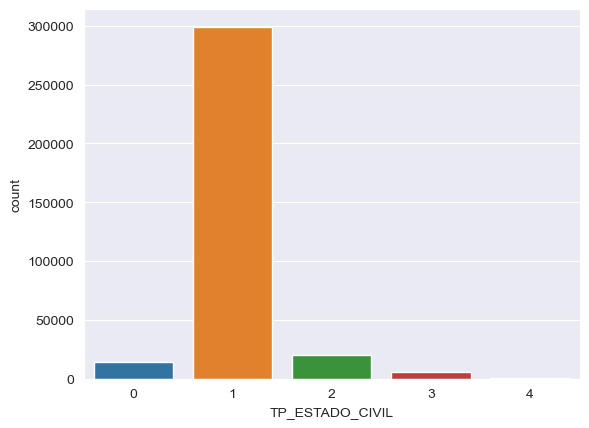

In [19]:
sns.countplot(data=df, x="TP_ESTADO_CIVIL")

In [ ]:
px.pie(pd.DataFrame(df["TP_ESTADO_CIVIL"].value_counts()), values='count', names=pd.DataFrame(df["TP_ESTADO_CIVIL"].value_counts()).index)

In [20]:
'''
0 - Não declarado
1 - Branca
2 - Preta
3 - Parda
4 - Amarela
5 - Indígena 
6 - Não dispõe da informação
'''

df["TP_COR_RACA"].value_counts().sort_index()

TP_COR_RACA
0      7159
1    135774
2     41135
3    146209
4      6723
5      1983
Name: count, dtype: int64

<Axes: xlabel='TP_COR_RACA', ylabel='count'>

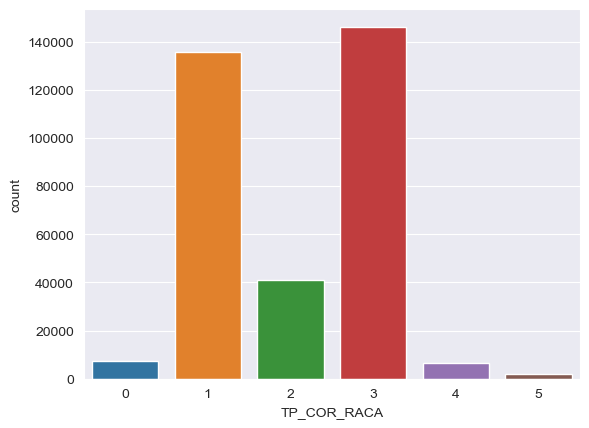

In [21]:
sns.countplot(data=df, x="TP_COR_RACA")

In [ ]:
px.pie(pd.DataFrame(df["TP_COR_RACA"].value_counts()), values='count', names=pd.DataFrame(df["TP_COR_RACA"].value_counts()).index)

In [22]:
ufs = df["SG_UF_PROVA"].value_counts()
ufs

SG_UF_PROVA
SP    50971
MG    32647
BA    26709
RJ    23826
CE    22135
PE    19459
PA    18730
RS    15126
PR    14266
GO    13550
MA    12634
PB    10199
AM     9076
SC     8134
RN     8072
PI     7856
DF     6790
ES     6538
AL     5706
MT     5546
SE     5306
MS     4230
RO     3247
TO     3165
AP     2183
AC     2029
RR      853
Name: count, dtype: int64

In [23]:
df_ufs = pd.DataFrame({"uf":ufs.index, "candidatos":ufs.values})
df_ufs.head()

uf  candidatos
0  SP       50971
1  MG       32647
2  BA       26709
3  RJ       23826
4  CE       22135

In [24]:
fig = px.treemap(data_frame=df_ufs, path=["uf"], values="candidatos")
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [25]:
'''
Até que série seu pai, ou o homem responsável por você, estudou?

A - Nunca estudou.
B - Não completou a 4ª série/5º ano do Ensino Fundamental.
C - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E - Completou o Ensino Médio, mas não completou a Faculdade.
F - Completou a Faculdade, mas não completou a Pós-graduação.
G - Completou a Pós-graduação.
H - Não sei.
'''
df["Q001"].value_counts().sort_index()

Q001
A    14892
B    64051
C    44985
D    37406
E    95792
F    30570
G    22012
H    29273
Name: count, dtype: int64

In [26]:
len(df.loc[df["Q001"]=="H"]) / df.shape[0] * 100

8.635536295330445

In [27]:
'''
Até que série sua mãe, ou a mulher responsável por você, estudou?

A - Nunca estudou.
B - Não completou a 4ª série/5º ano do Ensino Fundamental.
C - Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D - Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E - Completou o Ensino Médio, mas não completou a Faculdade.
F - Completou a Faculdade, mas não completou a Pós-graduação.
G - Completou a Pós-graduação.
'''

df["Q002"].value_counts().sort_index()

Q002
A      9999
B     47064
C     38909
D     39859
E    114785
F     41143
G     38181
H      9041
Name: count, dtype: int64

In [28]:
len(df.loc[df["Q002"]=="H"]) / df.shape[0] * 100

2.66709540006431

In [29]:
df["pai_possui_nivel_superior"] = df["Q001"].isin(["F","G"])
df["mae_possui_nivel_superior"] = df["Q002"].isin(["F","G"])
df.head()

TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
0                2       F                0            2                 1   
1                3       M                1            1                 1   
2               11       F                0            0                 1   
3                3       M                1            2                 1   
4                3       F                1            1                 1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
0                2                0          2       1.00             0   
1                2                0          2       1.00             0   
2                1                7          1        NaN             0   
3                2                0          2       1.00             0   
4                2                0          2       1.00             0   

  SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
0       NaN                     NaN                 NaN              NaN   
1        MT                    4.00                1.00             1.00   
2       NaN                     NaN                 NaN              NaN   
3        SP                    2.00                1.00             1.00   
4        SP                    4.00                1.00             1.00   

  SG_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
0          PE               1               1               1               1   
1          MT               1               1               1               1   
2          SP               0               0               0               0   
3          SP               1               1               1               1   
4          SP               1               1               1               1   

   NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  \
0      401.70      484.40      407.30      410.90          0   
1      660.70      481.40      623.20      627.60          0   
2         NaN         NaN         NaN         NaN          0   
3      396.00      475.50      451.80      476.10          0   
4      358.40      435.60      478.50      544.70          0   

   TP_STATUS_REDACAO  NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  \
0               1.00         120.00         120.00         120.00   
1               1.00         160.00         200.00         120.00   
2                NaN            NaN            NaN            NaN   
3               1.00          80.00         120.00          80.00   
4               1.00         120.00         100.00         100.00   

   NU_NOTA_COMP4  NU_NOTA_COMP5  NU_NOTA_REDACAO Q001 Q002 Q003 Q004  Q005  \
0         120.00         140.00           620.00    B    E    B    D  5.00   
1         160.00         200.00           840.00    E    E    E    E  4.00   
2            NaN            NaN              NaN    E    E    F    B  4.00   
3         120.00         140.00           540.00    D    D    B    C  4.00   
4         120.00         100.00           540.00    F    G    D    B  3.00   

  Q006 Q007 Q008 Q009 Q010 Q011 Q012 Q013 Q014 Q015 Q016 Q017 Q018 Q019 Q020  \
0    C    A    B    C    A    A    B    B    A    A    B    A    A    B    A   
1    M    D    E    E    B    B    B    B    B    A    B    A    B    C    A   
2    E    A    D    D    A    A    B    B    B    A    A    A    B    D    A   
3    D    A    B    C    B    A    B    B    B    B    B    A    B    B    A   
4    F    A    B    B    B    A    B    B    B    A    B    A    A    C    B   

  Q021 Q022 Q023 Q024 Q025  pai_possui_nivel_superior  \
0    A    E    A    A    B                      False   
1    A    E    A    C    B                      False   
2    A    C    A    A    B                      False   
3    A    E    A    B    B                      False   
4    B    C    A    C    B                       True   

   mae_possui_nivel_superior  
0              

In [30]:
df["pai_possui_nivel_superior"].value_counts(normalize=True) * 100

pai_possui_nivel_superior
False   84.49
True    15.51
Name: proportion, dtype: float64

<Axes: xlabel='pai_possui_nivel_superior', ylabel='count'>

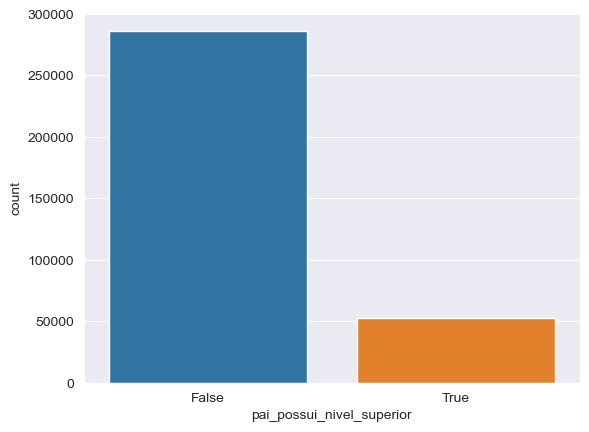

In [31]:
sns.countplot(data=df, x="pai_possui_nivel_superior")

In [32]:
df["mae_possui_nivel_superior"].value_counts(normalize=True) * 100

mae_possui_nivel_superior
False   76.60
True    23.40
Name: proportion, dtype: float64

<Axes: xlabel='mae_possui_nivel_superior', ylabel='count'>

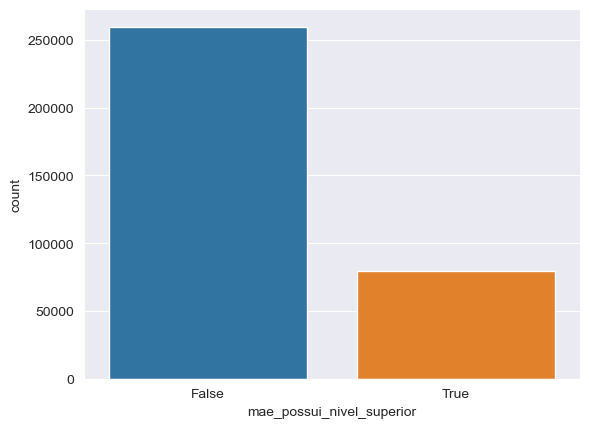

In [33]:
sns.countplot(data=df, x="mae_possui_nivel_superior")

In [34]:
df.loc[df["Q006"].isnull()]

TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
202645               12       F                2            3   
280727                8       F                1            4   

        TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
202645                 1                1               15          1   
280727                 3                1                4          1   

        TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
202645        NaN             0       NaN                     NaN   
280727        NaN             0       NaN                     NaN   

        TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC SG_UF_PROVA  TP_PRESENCA_CN  \
202645                 NaN              NaN          RN               0   
280727                 NaN              NaN          SP               1   

        TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  NU_NOTA_CN  \
202645               0               0               0         NaN   
280727               1               1               1      385.00   

        NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  TP_STATUS_REDACAO  \
202645         NaN         NaN         NaN          0                NaN   
280727      389.30      519.60      522.50          1               1.00   

        NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  NU_NOTA_COMP4  \
202645            NaN            NaN            NaN            NaN   
280727         120.00         120.00         120.00         100.00   

        NU_NOTA_COMP5  NU_NOTA_REDACAO Q001 Q002 Q003 Q004  Q005 Q006 Q007  \
202645            NaN              NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   
280727          60.00           520.00  NaN  NaN  NaN  NaN   NaN  NaN  NaN   

       Q008 Q009 Q010 Q011 Q012 Q013 Q014 Q015 Q016 Q017 Q018 Q019 Q020 Q021  \
202645  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
280727  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       Q022 Q023 Q024 Q025  pai_possui_nivel_superior  \
202645  NaN  NaN  NaN  NaN                      False   
280727  NaN  NaN  NaN  NaN                      False   

        mae_possui_nivel_superior  
202645                      False  
280727                      False

In [35]:
'''
Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

A - Nenhuma Renda
B - Até R$ 1.100,00
C - De R$ 1.100,01 até R$ 1.650,00.
D - De R$ 1.650,01 até R$ 2.200,00.
E - De R$ 2.200,01 até R$ 2.750,00.
F - De R$ 2.750,01 até R$ 3.300,00.
G - De R$ 3.300,01 até R$ 4.400,00.
H - De R$ 4.400,01 até R$ 5.500,00.
I - De R$ 5.500,01 até R$ 6.600,00.
J - De R$ 6.600,01 até R$ 7.700,00.
K - De R$ 7.700,01 até R$ 8.800,00.
L - De R$ 8.800,01 até R$ 9.900,00.
M - De R$ 9.900,01 até R$ 11.000,00.
N - De R$ 11.000,01 até R$ 13.200,00.
O - De R$ 13.200,01 até R$ 16.500,00.
P - De R$ 16.500,01 até R$ 22.000,00.
Q - Acima de R$ 22.000,00.
'''
myDic = dict()
for i in range(17):
    myDic[chr(i+65)] = i
print(myDic)

df["renda_familiar"] = df["Q006"].map(myDic)
df.head()

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16}


TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
0                2       F                0            2                 1   
1                3       M                1            1                 1   
2               11       F                0            0                 1   
3                3       M                1            2                 1   
4                3       F                1            1                 1   

   TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
0                2                0          2       1.00             0   
1                2                0          2       1.00             0   
2                1                7          1        NaN             0   
3                2                0          2       1.00             0   
4                2                0          2       1.00             0   

  SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
0       NaN                     NaN                 NaN              NaN   
1        MT                    4.00                1.00             1.00   
2       NaN                     NaN                 NaN              NaN   
3        SP                    2.00                1.00             1.00   
4        SP                    4.00                1.00             1.00   

  SG_UF_PROVA  TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT  \
0          PE               1               1               1               1   
1          MT               1               1               1               1   
2          SP               0               0               0               0   
3          SP               1               1               1               1   
4          SP               1               1               1               1   

   NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  TP_LINGUA  \
0      401.70      484.40      407.30      410.90          0   
1      660.70      481.40      623.20      627.60          0   
2         NaN         NaN         NaN         NaN          0   
3      396.00      475.50      451.80      476.10          0   
4      358.40      435.60      478.50      544.70          0   

   TP_STATUS_REDACAO  NU_NOTA_COMP1  NU_NOTA_COMP2  NU_NOTA_COMP3  \
0               1.00         120.00         120.00         120.00   
1               1.00         160.00         200.00         120.00   
2                NaN            NaN            NaN            NaN   
3               1.00          80.00         120.00          80.00   
4               1.00         120.00         100.00         100.00   

   NU_NOTA_COMP4  NU_NOTA_COMP5  NU_NOTA_REDACAO Q001 Q002 Q003 Q004  Q005  \
0         120.00         140.00           620.00    B    E    B    D  5.00   
1         160.00         200.00           840.00    E    E    E    E  4.00   
2            NaN            NaN              NaN    E    E    F    B  4.00   
3         120.00         140.00           540.00    D    D    B    C  4.00   
4         120.00         100.00           540.00    F    G    D    B  3.00   

  Q006 Q007 Q008 Q009 Q010 Q011 Q012 Q013 Q014 Q015 Q016 Q017 Q018 Q019 Q020  \
0    C    A    B    C    A    A    B    B    A    A    B    A    A    B    A   
1    M    D    E    E    B    B    B    B    B    A    B    A    B    C    A   
2    E    A    D    D    A    A    B    B    B    A    A    A    B    D    A   
3    D    A    B    C    B    A    B    B    B    B    B    A    B    B    A   
4    F    A    B    B    B    A    B    B    B    A    B    A    A    C    B   

  Q021 Q022 Q023 Q024 Q025  pai_possui_nivel_superior  \
0    A    E    A    A    B                      False   
1    A    E    A    C    B                      False   
2    A    C    A    A    B                      False   
3    A    E    A    B    B                      False   
4    B    C    A    C    B                       True   

   mae_possui_nivel_superior  renda_familiar  

<Axes: xlabel='renda_familiar', ylabel='count'>

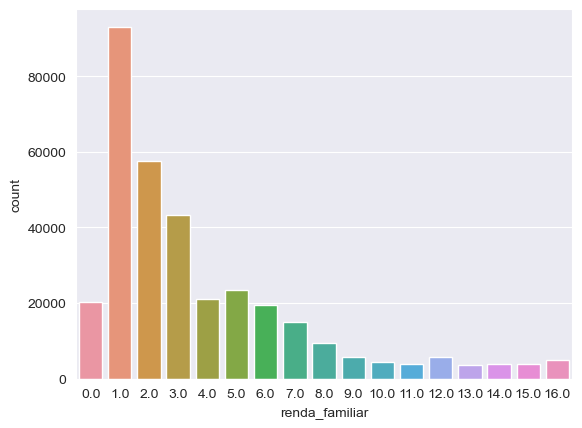

In [36]:
sns.countplot(data=df, x="renda_familiar")

In [37]:
df_notas_sexo = df.loc[:,col_notas+["TP_SEXO"]]
df_notas_sexo.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO TP_SEXO
0      401.70      484.40      407.30      410.90           620.00       F
1      660.70      481.40      623.20      627.60           840.00       M
2         NaN         NaN         NaN         NaN              NaN       F
3      396.00      475.50      451.80      476.10           540.00       M
4      358.40      435.60      478.50      544.70           540.00       F

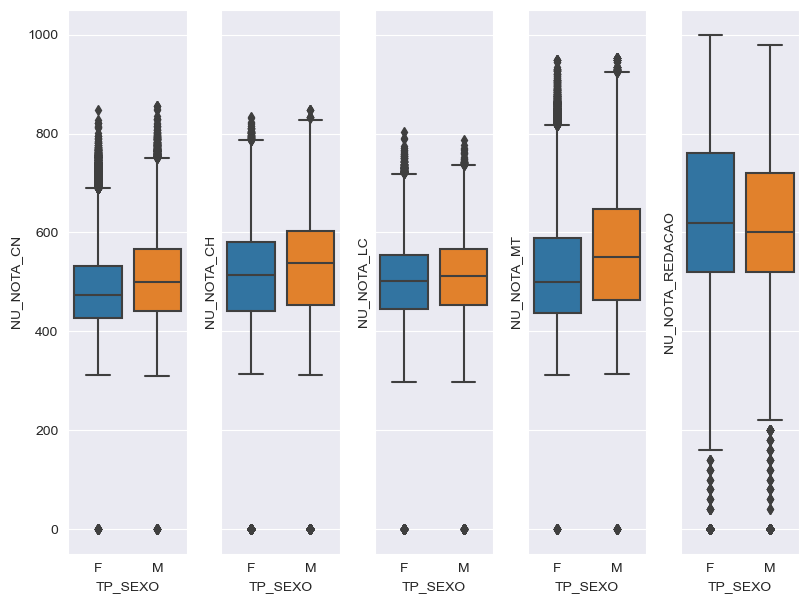

In [38]:
fig, graf = plt.subplots(1,5, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(5):
    sns.boxplot(data=df_notas_sexo, y=col_notas[i], x="TP_SEXO", ax=graf[i])


In [39]:
df_notas_raca = df.loc[:,col_notas+["TP_COR_RACA"]]
df_notas_raca.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0      401.70      484.40      407.30      410.90           620.00   
1      660.70      481.40      623.20      627.60           840.00   
2         NaN         NaN         NaN         NaN              NaN   
3      396.00      475.50      451.80      476.10           540.00   
4      358.40      435.60      478.50      544.70           540.00   

   TP_COR_RACA  
0            2  
1            1  
2            0  
3            2  
4            1

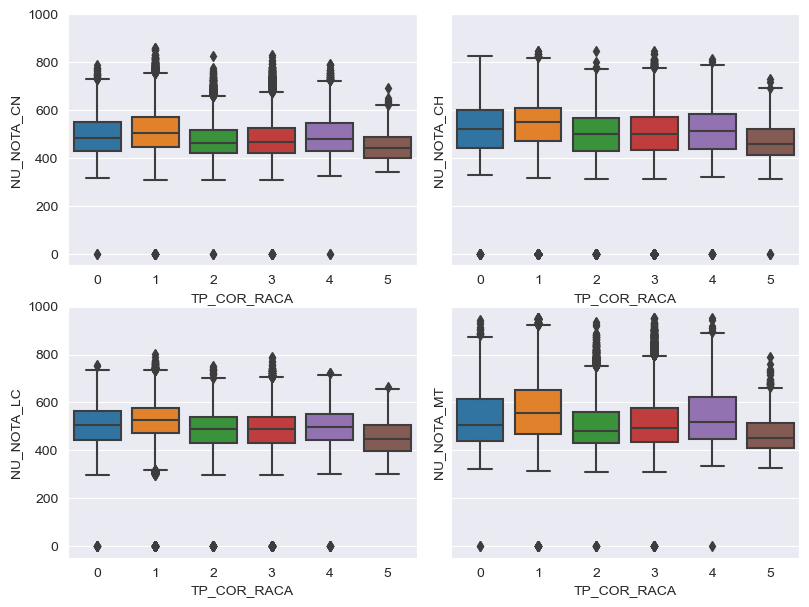

In [40]:
fig, graf = plt.subplots(2,2, sharey=True, figsize=(8,6))
plt.tight_layout()

j=0
for i in range(2):
    sns.boxplot(data=df_notas_raca, y=col_notas[j], x="TP_COR_RACA", ax=graf[i][0])
    sns.boxplot(data=df_notas_raca, y=col_notas[j+1], x="TP_COR_RACA", ax=graf[i][1])
    j=2

<Axes: xlabel='TP_COR_RACA', ylabel='NU_NOTA_REDACAO'>

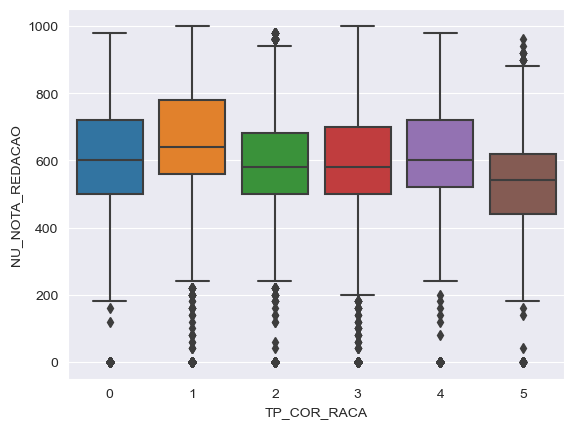

In [41]:
sns.boxplot(data=df_notas_raca, y=col_notas[4], x="TP_COR_RACA")

In [42]:
col_instrucao_pais = col_notas + ["pai_possui_nivel_superior","mae_possui_nivel_superior"]
df_instrucao_pais = df.loc[:, col_instrucao_pais]
df_instrucao_pais.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0      401.70      484.40      407.30      410.90           620.00   
1      660.70      481.40      623.20      627.60           840.00   
2         NaN         NaN         NaN         NaN              NaN   
3      396.00      475.50      451.80      476.10           540.00   
4      358.40      435.60      478.50      544.70           540.00   

   pai_possui_nivel_superior  mae_possui_nivel_superior  
0                      False                      False  
1                      False                      False  
2                      False                      False  
3                      False                      False  
4                       True                       True

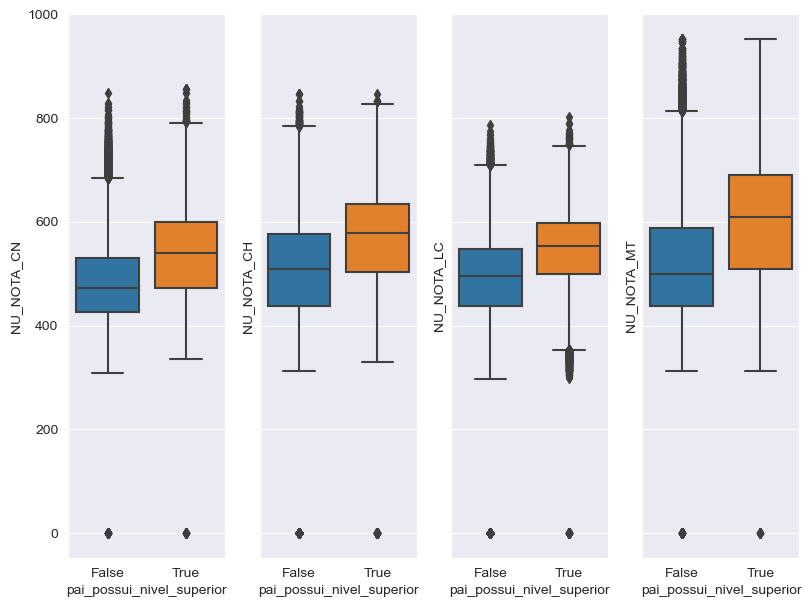

In [43]:
fig, graf = plt.subplots(1,4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    sns.boxplot(data=df_instrucao_pais, y=col_notas[i], x="pai_possui_nivel_superior", ax=graf[i])

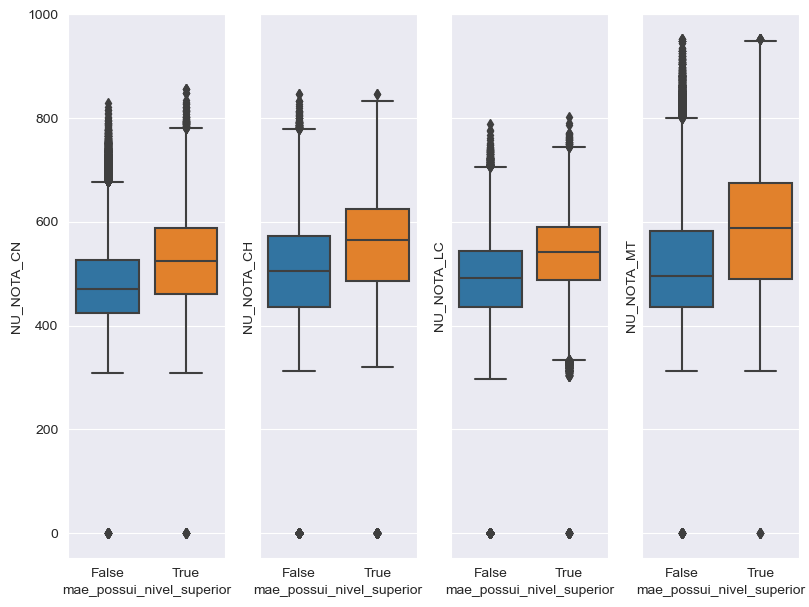

In [44]:
fig, graf = plt.subplots(1,4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    sns.boxplot(data=df_instrucao_pais, y=col_notas[i], x="mae_possui_nivel_superior", ax=graf[i])

<Axes: xlabel='TP_FAIXA_ETARIA', ylabel='NU_NOTA_CN'>

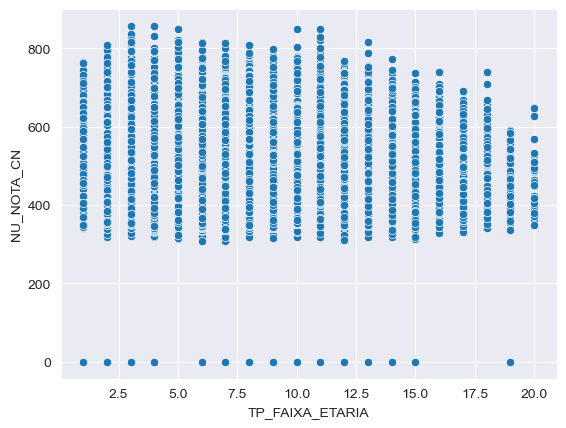

In [45]:
df_idade = df.loc[:, col_notas + ["TP_FAIXA_ETARIA"]]
sns.scatterplot(data=df_idade, x="TP_FAIXA_ETARIA", y="NU_NOTA_CN")

<Axes: >

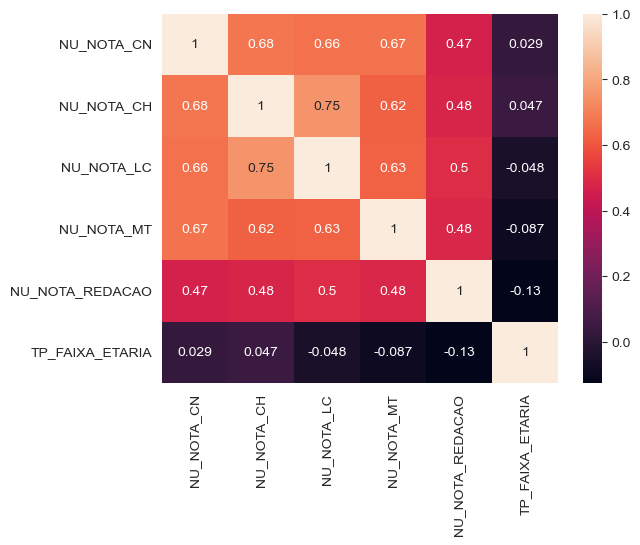

In [46]:
corr = df_idade.corr()
sns.heatmap(corr,  annot=True)

<Figure size 640x480 with 0 Axes>

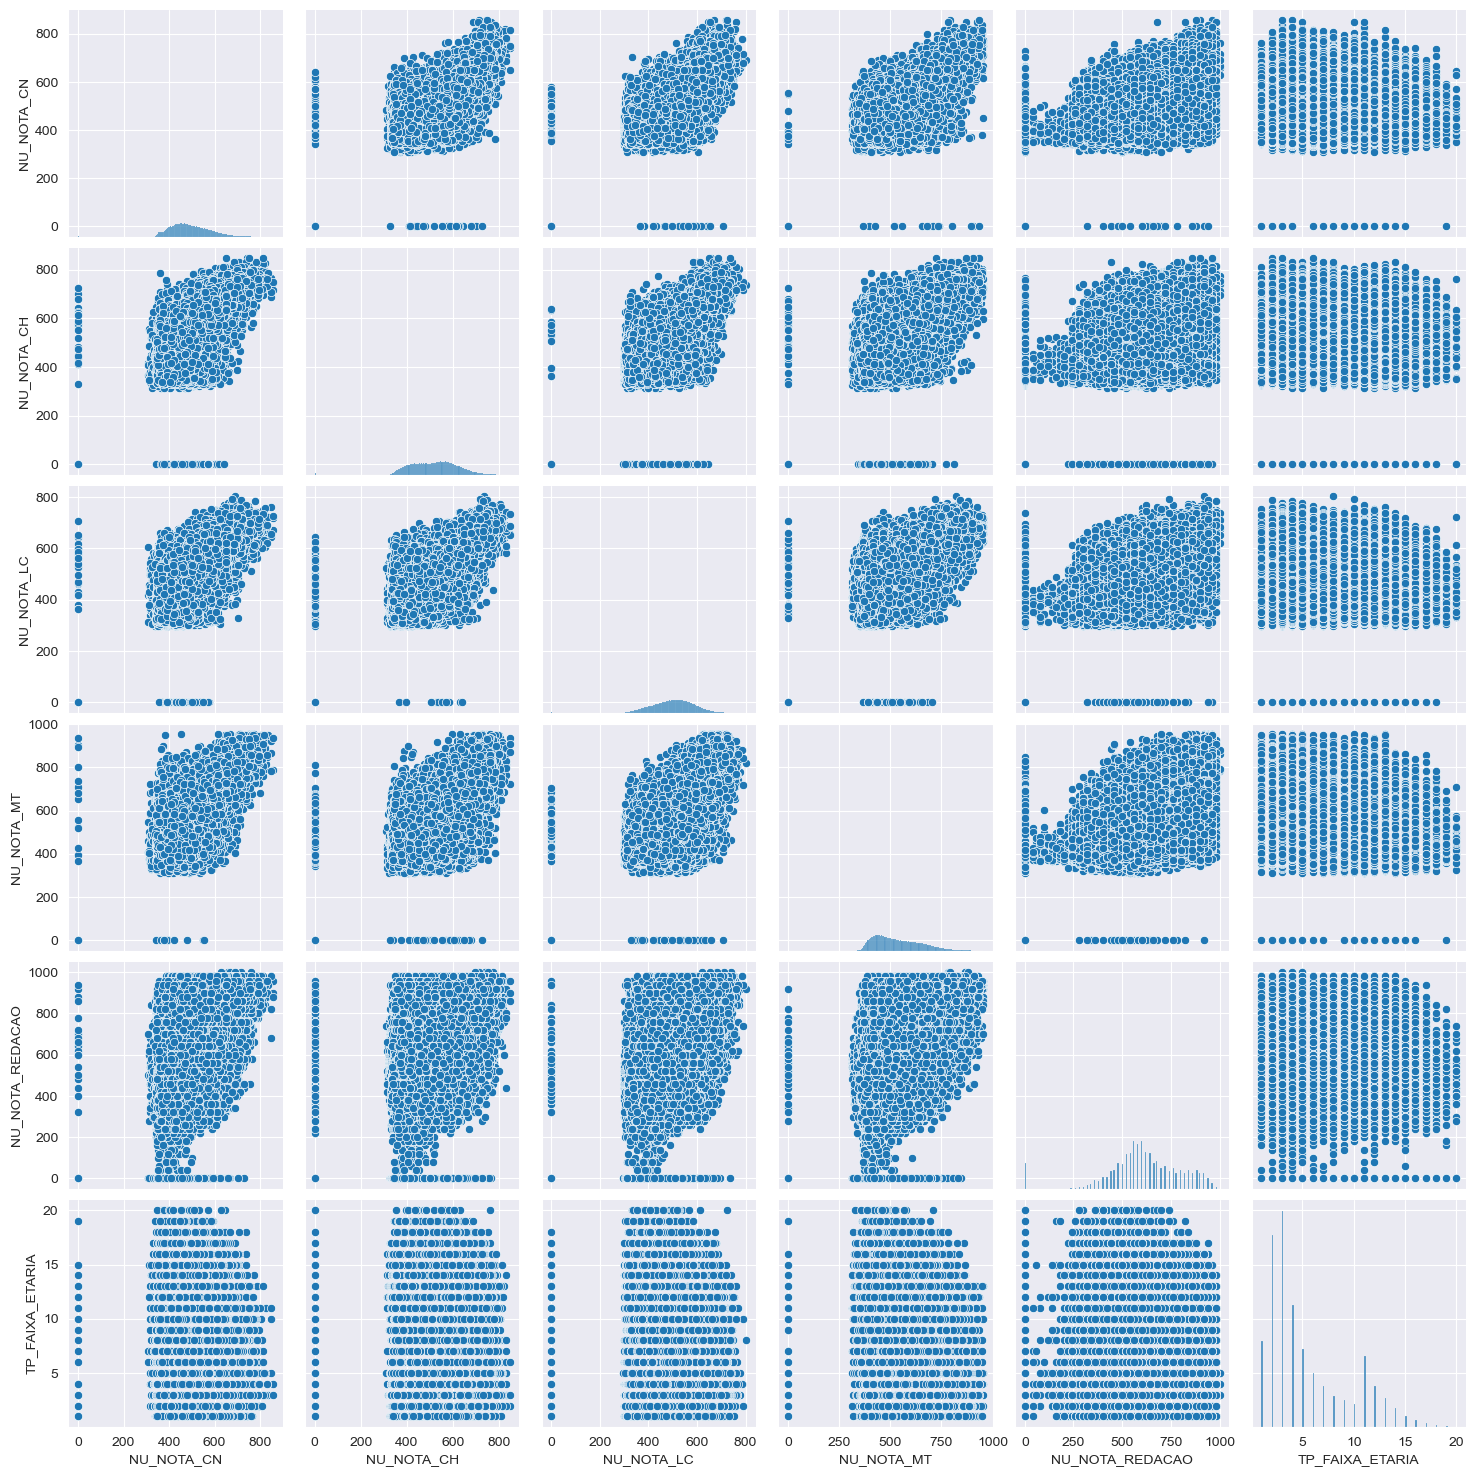

In [47]:
plt.tight_layout()
sns.pairplot(df_idade)

<Axes: xlabel='renda_familiar', ylabel='NU_NOTA_CN'>

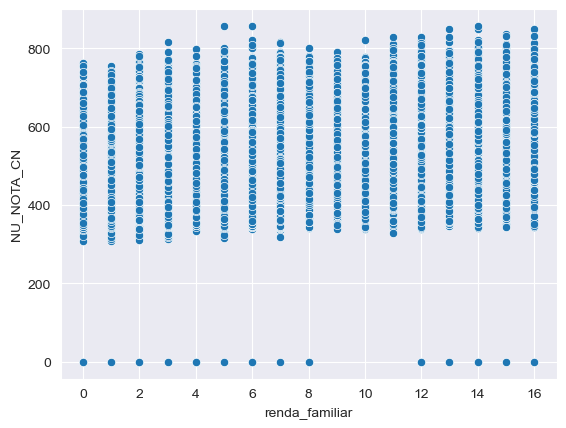

In [48]:
df_renda = df.loc[:, col_notas + ["renda_familiar"]]
sns.scatterplot(data=df_renda, x="renda_familiar", y="NU_NOTA_CN")

<Axes: >

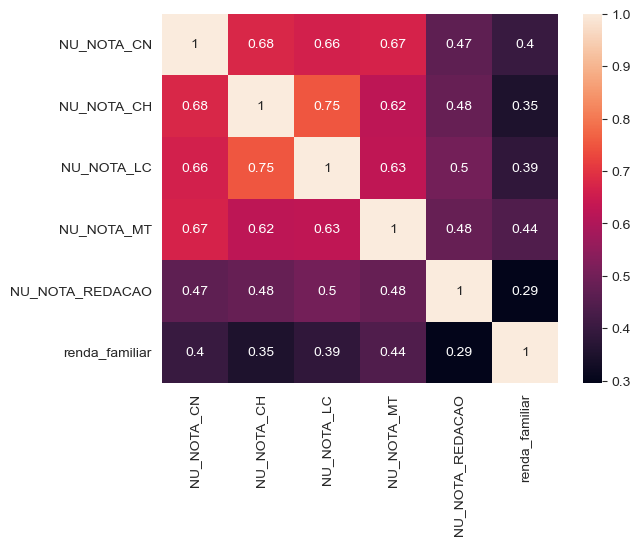

In [49]:
corr = df_renda.corr()
sns.heatmap(corr,  annot=True)

<Figure size 640x480 with 0 Axes>

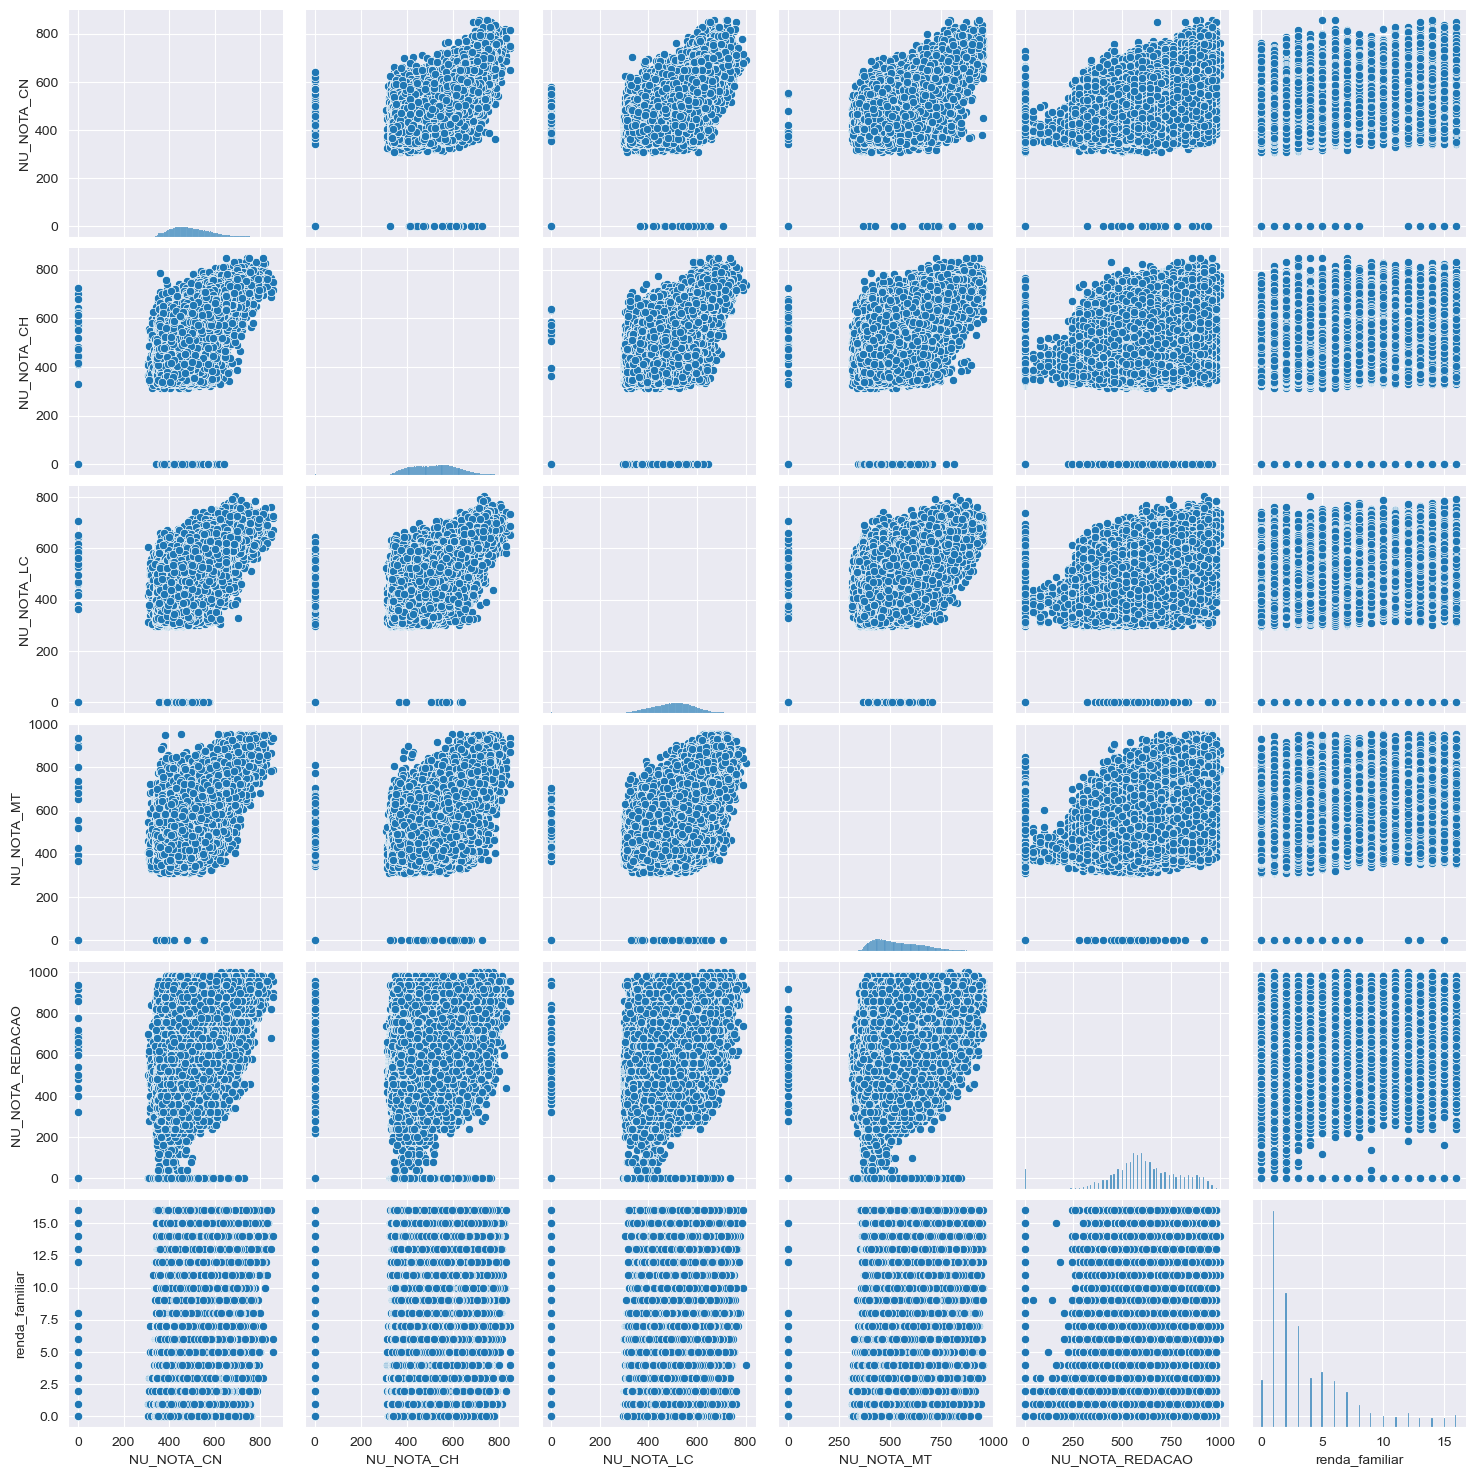

In [50]:
plt.tight_layout()
sns.pairplot(df_renda)